In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys
import os

sys.path.insert(0, '../dual_task')
current_dir = os.path.dirname(os.path.abspath('__file__'))
# Get parent directory (= the project root)
project_root = os.path.join(current_dir, '..')
# Append to system path
sys.path.append(project_root)

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import sem
from scipy.io import loadmat
# from pingouin import rm_anova, anova

import dual_data.common
from dual_data.common.plot_utils import save_fig
from dual_data.stats.bootstrap import my_boots_ci
from dual_data.licks.licks import *


In [5]:
sns.set_context("poster")
sns.set_style("ticks")
plt.rc("axes.spines", top=False, right=False)
fig_path = '../figs/perf'
golden_ratio = (5**.5 - 1) / 2
width = 6
import matplotlib
matplotlib.rcParams['figure.figsize'] = [width, width * golden_ratio ]
# matplotlib.rcParams['lines.markersize'] = 3
# sns.set(rc={'figure.figsize':(width, width * golden_ratio)})
%matplotlib inline


Licks from a given animal

In [6]:
# path = '../data/behavior/DualTask_DPA_vs_Single_DPA/'
path = '../data/behavior/DualTask-Silencing-ACC-Prl/'
# path = '../data/behavior/DualTask-Silencing-ACC/'

In [7]:
i_mouse = 2
i_session = 1
session = 'control' # control opto DPA or Dual

data = loadmat(path + session + '_mouse_%d/session_%d' % (i_mouse, i_session))
#data.keys()

In [8]:
licks, t_sample, t_dist, t_test, t_go, t_nogo, t_correct, t_incorrect = get_licks_and_times(data, path)

print('Times')
print('licks', licks[:5])
print('sample', t_sample[0][:5])
print('dist', t_dist[0][:5])
print('go', t_go[0][:5])
print('nogo', t_nogo[0][:5])
print('test', t_test[0][:5])
print('correct', t_correct[:5])
print('incorrect', t_incorrect[:5])
print('performance', t_correct.shape[0]/(t_correct.shape[0]+t_incorrect.shape[0]))

Times
licks [2.123 2.323 2.463 7.784 7.927]
sample [ 0.    21.023 42.049 63.071 84.093]
dist [  4.003  25.029  67.077 109.121 130.147]
go [ 25.029  67.077 109.121 235.266 319.362]
nogo [  4.003 130.147 214.244 256.291 298.335]
test [11.011 32.038 53.06  74.086 95.108]
correct [ 54.12   75.179  96.243 117.19  138.213]
incorrect [ 12.06   33.086 159.206 180.219 201.274]
performance 0.5416666666666666


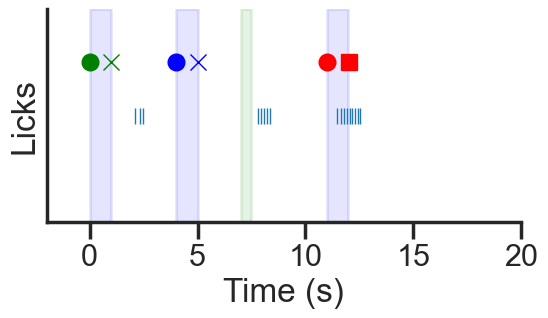

In [9]:
n_trials = 20
plt.plot(t_sample[0][:n_trials], np.ones(n_trials), 'go')
plt.plot(t_sample[1][:n_trials], np.ones(n_trials), 'gx')
plt.plot(t_dist[0][:n_trials], np.ones(n_trials), 'bo')
plt.plot(t_dist[1][:n_trials], np.ones(n_trials), 'bx')
plt.plot(t_test[0][:n_trials], np.ones(n_trials), 'ro')
plt.plot(t_test[1][:n_trials], np.ones(n_trials), 'rs')

n_licks = 100
plt.plot(licks[:n_licks], 0.95 * np.ones(n_licks), '|')
plt.ylim([0.85, 1.05])
plt.xlim([-2, 20])

add_vlines()

plt.xlabel('Time (s)')
plt.ylabel('Licks')
plt.yticks([])
plt.show()


In [10]:
licks_dpa, licks_go, licks_nogo = get_licks_mouse(data, path, verbose=1)

licks: DPA (64, 25) Go (64, 32) NoGo (64, 24)


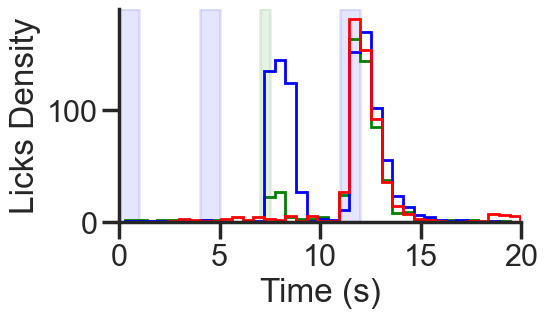

In [11]:
licks_all = [ np.hstack(licks_dpa), np.hstack(licks_go), np.hstack(licks_nogo)]
licks_density, bins = plot_licks_hist(licks_all, n_bins='auto')


Licks for all Mice

In [17]:
mice_dpa, mice_go, mice_nogo = get_licks_mice(path, n_session=10, response="")

mouse control_mouse_0


dpa (64, 475) go (64, 690) nogo (64, 460)
mouse control_mouse_1


dpa (64, 188) go (64, 326) nogo (64, 177)
mouse control_mouse_2


dpa (64, 276) go (64, 327) nogo (64, 199)
mouse control_mouse_3


dpa (64, 231) go (64, 289) nogo (64, 208)
mouse control_mouse_4


dpa (64, 212) go (64, 317) nogo (64, 224)
mouse control_mouse_5


dpa (64, 212) go (64, 307) nogo (64, 154)
mouse control_mouse_6


dpa (64, 310) go (64, 503) nogo (64, 264)
mouse control_mouse_7


dpa (64, 179) go (64, 262) nogo (64, 154)
mouse control_mouse_8


dpa (64, 192) go (64, 333) nogo (64, 195)
mouse opto_mouse_0


dpa (64, 217) go (64, 327) nogo (64, 193)
mouse opto_mouse_1


dpa (64, 286) go (64, 431) nogo (64, 272)
mouse opto_mouse_2


dpa (64, 311) go (64, 435) nogo (64, 299)
mouse opto_mouse_3


dpa (64, 311) go (64, 305) nogo (64, 243)
mouse opto_mouse_4


dpa (64, 247) go (64, 310) nogo (64, 226)
mouse opto_mouse_5


dpa (64, 258) go (64, 309) nogo (64, 233)
mouse opto_mouse_6


dpa (64, 717) go (64, 849) nogo (64, 591)
mouse opto_mouse_7


dpa (64, 264) go (64, 317) nogo (64, 264)
mouse opto_mouse_8


dpa (64, 231) go (64, 281) nogo (64, 178)


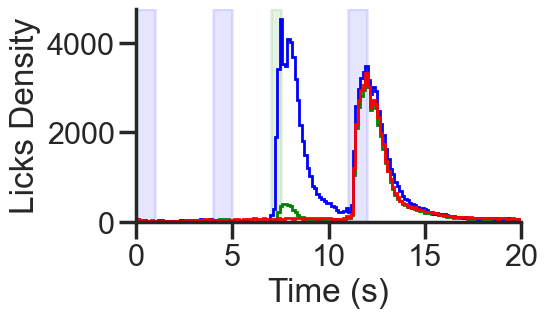

In [91]:
dpa_all = hstack_with_padding(mice_dpa[:9])
go_all = hstack_with_padding(mice_go[:9])
nogo_all = hstack_with_padding(mice_nogo[:9])

licks_all = [ np.hstack(dpa_all), np.hstack(go_all), np.hstack(nogo_all)]

licks_density, bins = plot_licks_hist(licks_all, n_bins='auto')

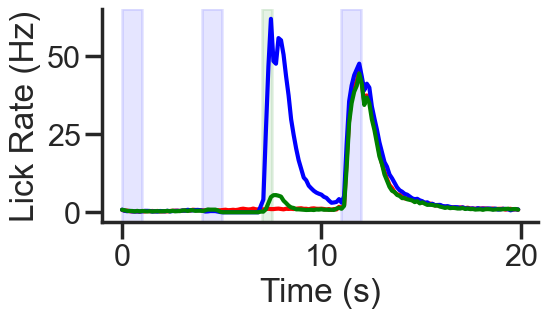

In [92]:
plot_lick_rate(licks_density, bins, n_mice=9)


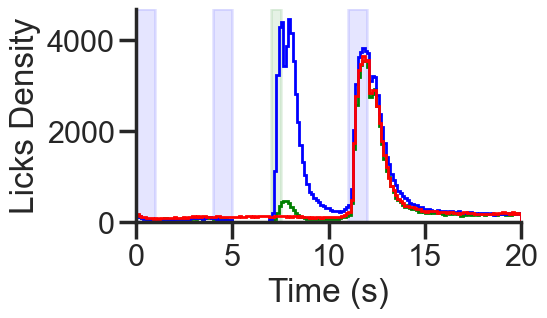

In [93]:
dpa_all = hstack_with_padding(mice_dpa[9:])
go_all = hstack_with_padding(mice_go[9:])
nogo_all = hstack_with_padding(mice_nogo[9:])

licks_all = [np.hstack(dpa_all), np.hstack(go_all), np.hstack(nogo_all)]

licks_density, bins = plot_licks_hist(licks_all, n_bins='auto')


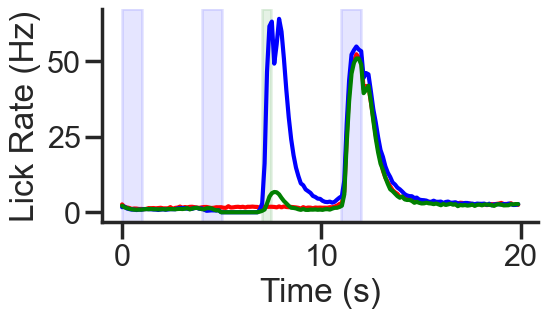

In [94]:
plot_lick_rate(licks_density, bins, n_mice=9)


In [90]:
def plot_lick_rate(licks_counts, bin_edges, n_mice=1):
    # convert count of events to rate (Hz) by dividing by the total time in seconds
    bin_widths = np.diff(bin_edges)
    rates = licks_counts / 64 / bin_widths / n_mice
    
    plt.plot(bins[:-1], rates[0], 'r')
    plt.plot(bins[:-1], rates[1], 'b')
    plt.plot(bins[:-1], rates[2], 'g')
    add_vlines()
    plt.xlabel('Time (s)')
    plt.ylabel('Lick Rate (Hz)')
    plt.show()


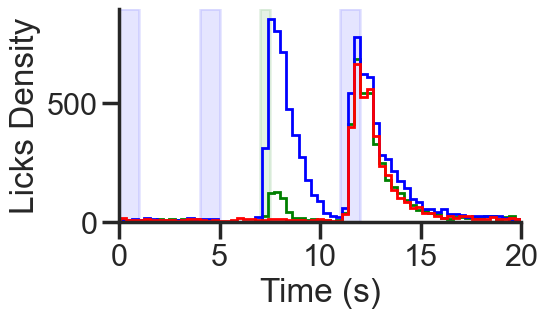

In [95]:
i_mouse = 1
licks_all = [np.hstack(mice_dpa[i_mouse]), np.hstack(mice_go[i_mouse]), np.hstack(mice_nogo[i_mouse])]
licks_density, bins = plot_licks_hist(licks_all, n_bins='auto')


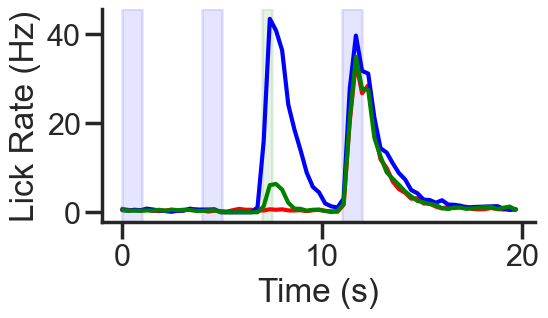

In [96]:
plot_lick_rate(licks_density, bins)


Animal Performance

In [93]:
perf = []

for i_mouse in range(8):
    
    perf_mouse = []
    
    for i_session in range(16):

        path = '../data/behavior/DualTask_DPA_vs_Single_DPA/'
        path += 'DPA_mouse_%d' % i_mouse
        path += '/session_%d.mat' % i_session
        data = loadmat(path)
    
        perf_single = np.mean(data['Data'].T[-1])

        path = '../data/behavior/DualTask_DPA_vs_Single_DPA/'
        path += 'Dual_mouse_%d' % i_mouse
        path += '/session_%d.mat' % i_session
        data = loadmat(path)
        
        perf_ODR = np.mean(data['Data1'].T[-1])
        perf_Go = np.mean(data['DataD1'].T[-1])
        perf_NoGo = np.mean(data['DataD2'].T[-1])
        
        perf_mouse.append(np.hstack((perf_single, perf_ODR, perf_Go, perf_NoGo)))
    
    perf.append(np.array(perf_mouse))
    
perf = np.array(perf)


In [94]:
mean_perf = np.mean(perf, axis=0).T
sem_perf = sem(perf, axis=0).T
print(perf.shape, sem_perf.shape)

(8, 16, 4) (4, 16)


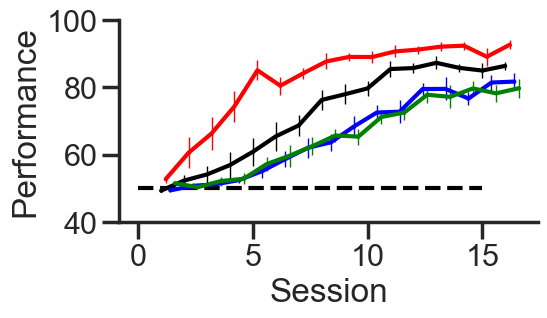

In [95]:
sessions = np.arange(1, 17, 1)

plt.errorbar(sessions, mean_perf[0], yerr=sem_perf[0], color='k', fmt='-o', ms=1, elinewidth=1)

plt.errorbar(sessions+.2, mean_perf[1], yerr=sem_perf[1], color='r', fmt='-o', ms=1, elinewidth=1)
plt.errorbar(sessions+.4, mean_perf[2], yerr=sem_perf[2], color='b', fmt='-o', ms=1, elinewidth=1)
plt.errorbar(sessions+.6, mean_perf[3], yerr=sem_perf[3], color='g', fmt='-o', ms=1, elinewidth=1)

plt.xlabel("Session")
plt.ylabel("Performance")
plt.ylim([40, 100])
plt.hlines(50, 0, 15, 'k', ls='--')
plt.show()


In [96]:
def get_perf_mice(path, n_session):
    df_mice = pd.DataFrame(columns=['hit', 'miss', 'fa', 'cr', 'perf', 'animal', 'session', 'task', 'opto'])    
    mice = np.sort(os.listdir(path))
    
    for mouse in mice:
    
        sessions = np.sort(os.listdir(path+mouse))
        # print(path+mouse)        
        
        for session in range(n_session+1):
            
            try:
                raw = loadmat(path + mouse + '/session_%d' % session)
            except:
                pass

            if 'opto' in mouse:
                session = session + .2

            if 0==1:
                # if 'DPA'in mouse:
                pass
            else:
                # for task in ["Single_DPA", "DPA", "DualGo", "DualNoGo", "ODR"]:
                # for task in ["ODR"]:
                for task in ["DPA", "DualGo", "DualNoGo"]:

                    try:
                        if task == "Single_DPA":
                            if 'DPA'in mouse:
                                data = np.mean(raw['Data'], 0)[1:]
                            else:
                                data = np.mean(raw['DataP'], 0)[1:]
                        elif task == "DPA":
                            if 'DPA'in mouse:
                                pass
                            else:
                                data = np.mean(raw['Data'], 0)[1:]
                        
                        elif task == "DualGo":
                            data = np.mean(raw['DataD1'], 0)[1:]
                        elif task == "DualNoGo":
                            data = np.mean(raw['DataD2'], 0)[1:]
                        elif task=='ODR':
                            data = np.mean(raw['Data1'], 0)[1:]
                        
                        data[-1] /= 100
                        data[:-1] /= np.sum(data[:-1])
                        data[:-1] *= 2
                    
                        data = data[np.newaxis]
                        df = pd.DataFrame(data, columns=['hit', 'miss', 'fa', 'cr', 'perf'])
                
                        df['animal'] = mouse[-1]
                        df['session'] = session 
                                            
                        if task=='DPA':
                            df['session'] = session 
                        if task=='DualGo':
                            df['session'] = session 
                        if task=='DualNoGo':
                            df['session'] = session
                            
                        # if task=='DPA':
                        #     df['session'] = session 
                        # if task=='DualGo':
                        #     df['session'] = session + .2
                        # if task=='DualNoGo':
                        #     df['session'] = session - .2
                            
                        df['task'] = task
                    
                        if 'opto' in mouse:
                            if path == '/home/leon/data/behavior/DualTask-Silencing-ACC/':
                                df['opto'] = 'opto_ACC'
                            else:
                                df['opto'] = 'opto'
                        else:
                            df['opto'] = 'control'
                        
                        df_mice = pd.concat([df_mice, df], ignore_index=True)

                    except:
                        pass
                    
    return df_mice


In [97]:
n_session = 16

path = '../data/behavior/DualTask-Silencing-ACC-Prl/'
df_ACC_Prl = get_perf_mice(path, n_session)

path = '../data/behavior/DualTask-Silencing-ACC/'
df_ACC = get_perf_mice(path, n_session)

path = '../data/behavior/DualTask_DPA_vs_Single_DPA/'
df_DPA = get_perf_mice(path, n_session)

df_all = df_DPA
df_all = pd.concat((df_ACC_Prl, df_ACC, df_DPA))

# print(df_all.head())


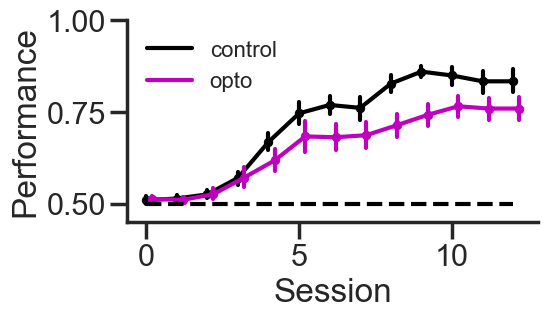

In [170]:
df_opto = df_ACC_Prl
# df_opto = pd.concat((df_ACC_Prl, df_ACC))

df_opto = df_opto[df_opto['session']<12.5]
df_opto = df_opto[df_opto['opto'] != 'opto_ACC']

palette = ['k', 'm']

figname = 'performance_ctrl_opto'
fig, ax = plt.subplots() 
sns.lineplot(data=df_opto, x='session', y='perf', hue='opto', errorbar='ci', palette=palette, legend=True, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=6)
plt.ylabel('Performance')
plt.xlabel('Session')
# plt.xlim([-.4, 10.4])
plt.legend(loc='best', frameon=False, fontsize=16)
plt.hlines(.5, 0, 12, 'k', ls='--')
plt.ylim([0.45, 1])

plt.yticks([0.5, 0.75,  1])
save_fig(fig, figname, fig_path)

plt.show()


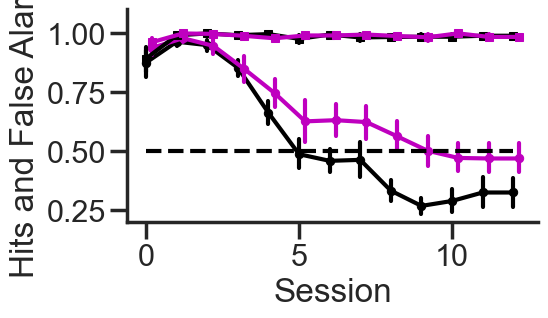

In [171]:
palette = ['k', 'm']

figname = 'fa_ctrl_opto'
fig, ax = plt.subplots()

sns.lineplot(data=df_opto, x='session', y='fa', hue='opto', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=6)
sns.lineplot(data=df_opto, x='session', y='hit', hue='opto', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='s', markeredgecolor=None, ax=ax, ms=6)
plt.ylabel('Hits and False Alarms')
plt.xlabel('Session')
# plt.xlim([-.4, 10.4])
# plt.legend(loc='best', frameon=False, fontsize=8)
plt.hlines(.5, 0, 12, 'k', ls='--')
plt.ylim([0.2, 1.1])

plt.yticks([0.25, 0.5, 0.75,  1])
save_fig(fig, figname, fig_path)

plt.show()


In [137]:
# df_all = pd.concat((df_ACC_Prl, df_ACC, df_DPA))

df_all = df_ACC_Prl

df_ctrl = df_all[df_all.opto=='control']
df_ctrl = df_ctrl.drop(columns=['opto'])
df_ctrl = df_ctrl[df_ctrl['session']<10.5]

df_DPA = pd.concat((df_ctrl[df_ctrl['task']=='DPA'], df_ctrl[df_ctrl['task']=='Single_DPA']))
df_ODR = df_ctrl[df_ctrl['task']=='ODR']

df_ctrl = df_ctrl[df_ctrl.task!='Single_DPA']
df_ctrl = df_ctrl[df_ctrl.task!='ODR']


# print(df_ctrl)
print(df_ODR.head())

Empty DataFrame
Columns: [hit, miss, fa, cr, perf, animal, session, task]
Index: []


/tmp/ipykernel_4170014/724908211.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_ODR, x='session', y='perf', hue='task', errorbar='ci', palette=palette, legend=True, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


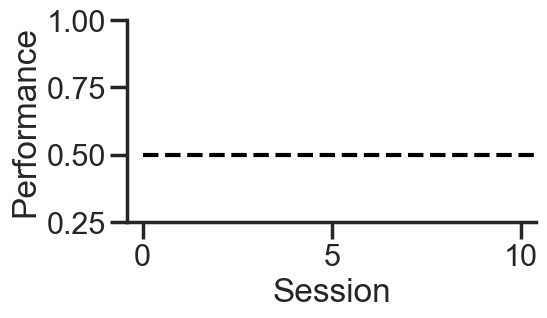

In [138]:
palette = ['m']

figname = 'performance_ODR'
fig, ax = plt.subplots() 
sns.lineplot(data=df_ODR, x='session', y='perf', hue='task', errorbar='ci', palette=palette, legend=True, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)
plt.ylabel('Performance')
plt.xlabel('Session')
plt.xlim([-.4, 10.4])
plt.legend(loc='best', frameon=False)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.ylim([0.45, 1])

plt.yticks([0.25, 0.5,  0.75, 1])
save_fig(fig, figname, fig_path)

plt.show()


/tmp/ipykernel_4170014/1033887251.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_ODR, x='session', y='fa', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)
/tmp/ipykernel_4170014/1033887251.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_ODR, x='session', y='hit', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='s', markeredgecolor=None, ax=ax, ms=3)


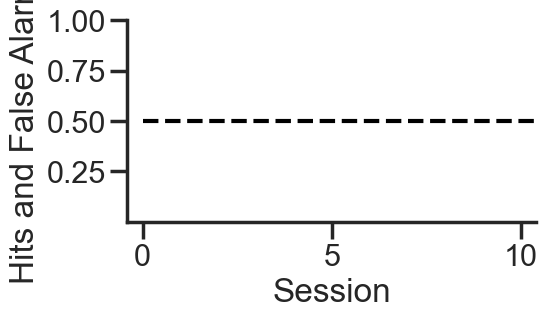

In [139]:
palette = ['m']

figname = 'hits_fa_ODR'
fig, ax = plt.subplots() 
sns.lineplot(data=df_ODR, x='session', y='fa', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)
sns.lineplot(data=df_ODR, x='session', y='hit', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='s', markeredgecolor=None, ax=ax, ms=3)
plt.ylabel('Hits and False Alarms')
plt.xlabel('Session')
plt.xlim([-.4, 10.4])
# plt.legend(loc='best', frameon=False, fontsize=6)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.ylim([0., 1])

plt.yticks([0.25, 0.5,  0.75, 1])
save_fig(fig, figname, fig_path)

plt.show()


/tmp/ipykernel_4170014/3726551166.py:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=df_DPA, x='session', y='perf', hue='task', errorbar='ci', palette=palette, legend=True, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)


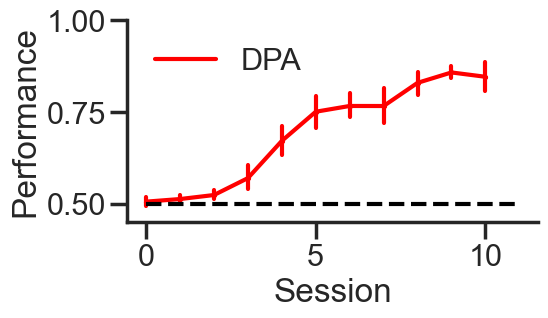

In [147]:
palette = ['r', 'b']

figname = 'performance_DPA'
fig, ax = plt.subplots() 
sns.lineplot(data=df_DPA, x='session', y='perf', hue='task', errorbar='ci', palette=palette, legend=True, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)
plt.ylabel('Performance')
plt.xlabel('Session')
# plt.xlim([-.4, 10.4])
plt.legend(loc='best', frameon=False)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.ylim([0.45, 1])

plt.yticks([0.5, 0.75, 1])
save_fig(fig, figname, fig_path)

plt.show()


/tmp/ipykernel_4170014/927612632.py:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=df_DPA, x='session', y='fa', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)
/tmp/ipykernel_4170014/927612632.py:6: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot(data=df_DPA, x='session', y='hit', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='s', markeredgecolor=None, ax=ax, ms=3)


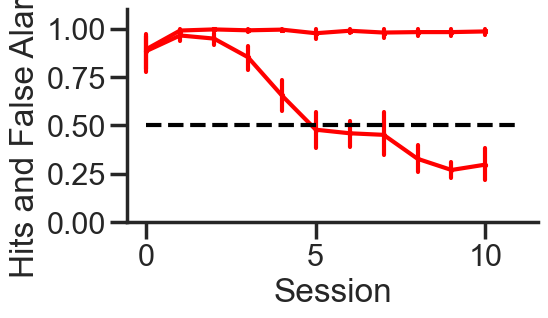

In [151]:
palette = ['r', 'b']

figname = 'hits_fa_DPA'
fig, ax = plt.subplots() 
sns.lineplot(data=df_DPA, x='session', y='fa', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=3)
sns.lineplot(data=df_DPA, x='session', y='hit', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='s', markeredgecolor=None, ax=ax, ms=3)
plt.ylabel('Hits and False Alarms')
plt.xlabel('Session')
# plt.xlim([-.4, 10.4])
# plt.legend(loc='best', frameon=False, fontsize=6)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.ylim([0., 1.1])

plt.yticks([0, 0.25, 0.5,  0.75, 1])
save_fig(fig, figname, fig_path)

plt.show()


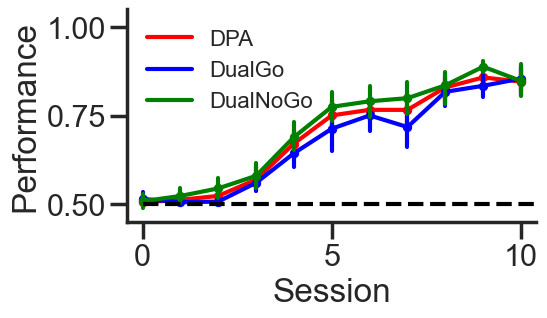

In [160]:
palette = ['r', 'b', 'g']

figname = 'performance'
fig, ax = plt.subplots() 
sns.lineplot(data=df_ctrl, x='session', y='perf', hue='task', errorbar='ci', palette=palette, legend=True, err_style='bars', marker='o', markeredgecolor=None, ax=ax, ms=6)
plt.ylabel('Performance')
plt.xlabel('Session')
plt.xlim([-.4, 10.4])
plt.legend(loc='upper left', frameon=False, fontsize=16)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.ylim([0.45, 1.05])

plt.yticks([0.5, 0.75, 1])
save_fig(fig, figname, fig_path)

plt.show()


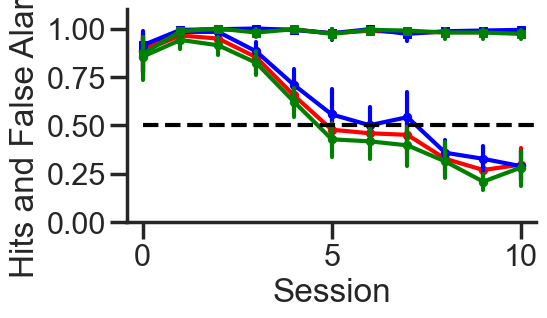

In [163]:
palette = ['r', 'b', 'g']
figname = 'false_alarms'

fig, ax = plt.subplots()
sns.lineplot(data=df_ctrl, x='session', y='fa', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='o', markeredgecolor=None, ms=6, ax=ax)
sns.lineplot(data=df_ctrl, x='session', y='hit', hue='task', errorbar='ci', palette=palette, legend=False, err_style='bars', marker='s', markeredgecolor=None, ms=6, ax=ax)
plt.ylabel('Hits and False Alarms')
plt.xlabel('Session')
plt.xlim([-.4, 10.4])
# plt.legend(loc='best', frameon=False, fontsize=6)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.ylim([0, 1.1])
plt.yticks([0, 0.25, 0.5, 0.75, 1])
save_fig(fig, figname, fig_path)

plt.show()


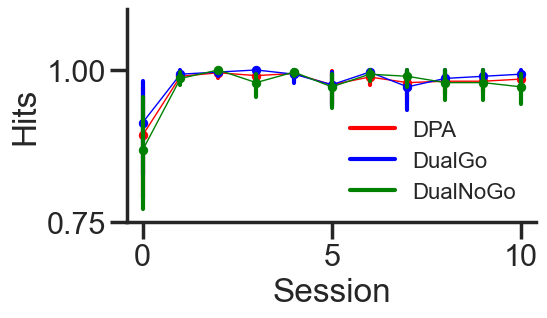

In [167]:
palette = ['r', 'b', 'g']
figname = 'hits'

sns.lineplot(data=df_ctrl, x='session', y='hit', hue='task', legend=True, errorbar='ci', err_style='bars', palette=palette, lw=1, marker='o', markeredgecolor=None, ms=6)
plt.ylabel('Hits')
plt.xlabel('Session')
plt.legend(loc='best', frameon=False, fontsize=16)
plt.hlines(.5, 0, 11, 'k', ls='--')
plt.xlim([-.4, 10.4])
plt.ylim([0.75, 1.1])
plt.yticks([0.75, 1])
save_fig(fig, figname, fig_path)

plt.show()
